<a href="https://colab.research.google.com/github/Dua-Sharif/Machine-Learning/blob/main/Lab02_AI_22303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [304]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [305]:
dataset=pd.read_csv('/content/house-prices.csv')
dataset.head()

,Home,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,Price
0,1,1790,2,2,2,No,East,114300
1,2,2030,4,2,3,No,East,114200
2,3,1740,3,2,1,No,East,114800
3,4,1980,3,2,3,No,East,94700
4,5,2130,3,3,3,No,East,119800


In [306]:
dataset.shape

(128, 8)

In [307]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   SqFt          128 non-null    int64 
 2   Bedrooms      128 non-null    int64 
 3   Bathrooms     128 non-null    int64 
 4   Offers        128 non-null    int64 
 5   Brick         128 non-null    object
 6   Neighborhood  128 non-null    object
 7   Price         128 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [308]:
# X will contain all features except Price wherease Y is targeted variable which is Price
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [309]:
ct = ColumnTransformer(transformers=[('neighborhood',
    OneHotEncoder(), [6]),
    ('brick', OneHotEncoder(),[5]),],
    remainder='passthrough')
X_encoded = ct.fit_transform(X)


1. Apply multiple regression to another dataset of your own choice. Try for different train-
test split and random states.


In [310]:
# when random state=38,42,47 and test size=0.3,0.4 it predicted more than actual value the best result it give on this state
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, test_size=0.4, random_state=0)
X_train.shape

(76, 10)

In [311]:
multi_regressor = LinearRegression()
multi_regressor.fit(X_train, y_train)

LinearRegression()

In [312]:
print(multi_regressor.coef_)
print(multi_regressor.intercept_)

[-8.04119568e+03 -7.09513357e+03  1.51363292e+04 -8.07460251e+03
  8.07460251e+03 -1.28657858e+01  5.57744493e+01  4.36729082e+03
  6.51395715e+03 -7.81952015e+03]
14732.5493794481


In [313]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.8449483276331191


In [314]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 7840.95579551986
MSE: 101217793.0766063
RMSE: 10060.70539657167


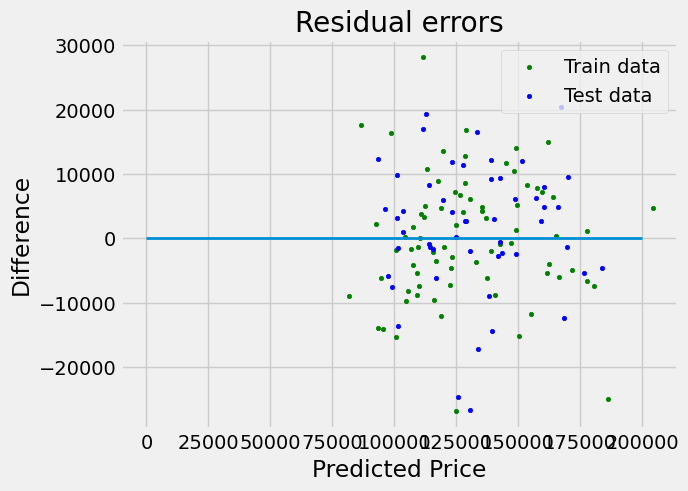

In [315]:
plt.scatter(multi_regressor.predict(X_train), multi_regressor.predict(X_train) - y_train,
            color="green", s=10, label='Train data')
plt.scatter(multi_regressor.predict(X_test), multi_regressor.predict(X_test) - y_test,
            color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=0, xmax=200000, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.xlabel("Predicted Price")
plt.ylabel("Difference")
plt.show()

2. For the given dataset (or for a dataset of your choice), run multiple regression on a subset
of predictors and observe the differences in your model’s performance.

In [316]:
y_pred = multi_regressor.predict(X_test)

In [317]:
# Make prediction
single_house_features = [4,1800, 3, 2, 3, 'Yes', 'East']
single_house_encoded = ct.transform([single_house_features])

In [318]:
predicted_price = multi_regressor.predict(single_house_encoded)
print(f"Predicted price for the house: ${predicted_price[0]:,.2f}")

Predicted price for the house: $117,779.73


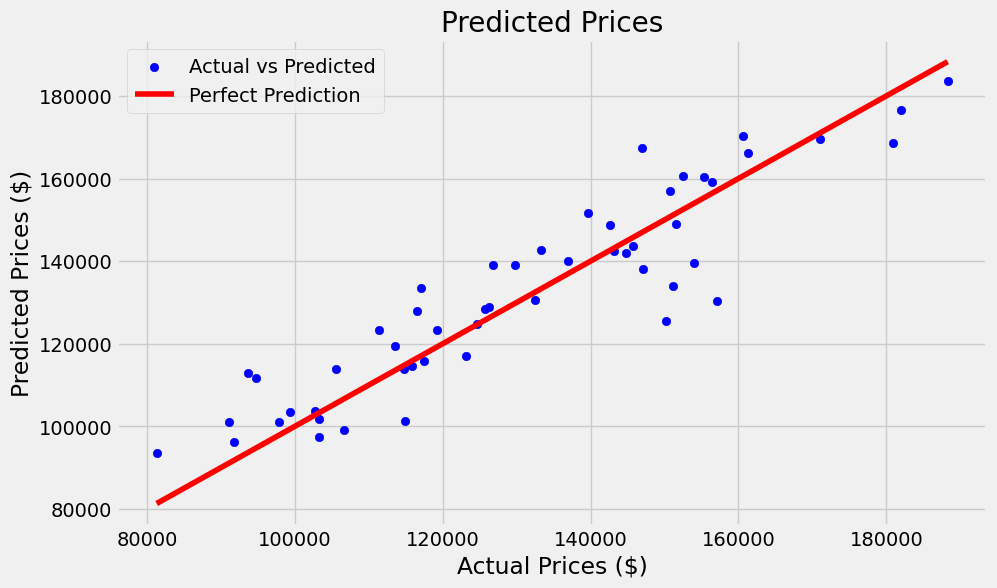

In [319]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Prediction')
plt.title('Predicted Prices')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.legend()
plt.show()

**Polynomial Regression**

3. Determine the performance metrics and generate a plot for polynomial regression by
selecting one predictor at a time from the given dataset. Set different values of degree of
polynomial to observe the variations.

In [320]:
# When increase the degree of polynomial it overfits the model when used degree=4,5,6..
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)

In [321]:
poly_regressor=LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

LinearRegression()

In [322]:
print(poly_regressor.coef_)
print(poly_regressor.intercept_)

[ 6.31835945e-03 -5.54202936e+00  7.65457658e+01 -7.10020078e+01
 -1.23660718e+01  1.23660845e+01 -2.45946898e+02  5.84969781e+02
  3.52205828e+01 -7.78897792e+00 -2.85151670e+02 -5.54376298e+00
 -1.96662407e-07 -3.61982233e-07  3.22605132e+02 -3.28148895e+02
  3.64051002e+01  1.91370140e+02  1.12736912e+02  1.87938121e+02
  2.54815336e+02  7.65457688e+01  2.27299601e-09 -9.75928244e+01
  1.74138593e+02  1.43372016e+03  1.48218779e+02  3.46884509e+02
 -2.48489247e+02 -1.32947767e+03 -7.10020057e+01 -2.37378390e+02
  1.66376384e+02 -1.71607215e+03  2.45380858e+02 -4.24400838e+02
  5.27621518e+01  7.89510663e+02 -1.23660821e+01 -1.94344818e-10
 -6.09988320e+02  2.93306589e+02 -1.64254818e+02 -1.81152083e+02
 -4.27790308e+02  1.23660821e+01  3.64041425e+02  2.91663189e+02
  1.99475400e+02  1.73363109e+02  1.42638637e+02 -2.71058849e+01
  4.29533516e+00 -1.54813913e+03 -1.95131876e+02  1.75083503e+02
 -6.70102314e-01  7.69472572e+01  8.76071173e+01 -6.85995560e+00
 -3.87628739e+02 -1.05338

4. For a dataset of your choice, repeat the same process for polynomial regression.

In [323]:
print('Variance score: {}'.format(multi_regressor.score(X_test, y_test)))

Variance score: 0.8449483276331191


In [324]:
print('MAE:', metrics.mean_absolute_error(y_test, y_poly_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_poly_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))

MAE: 33607.39134673147
MSE: 2547916166.9133806
RMSE: 50476.8874527083


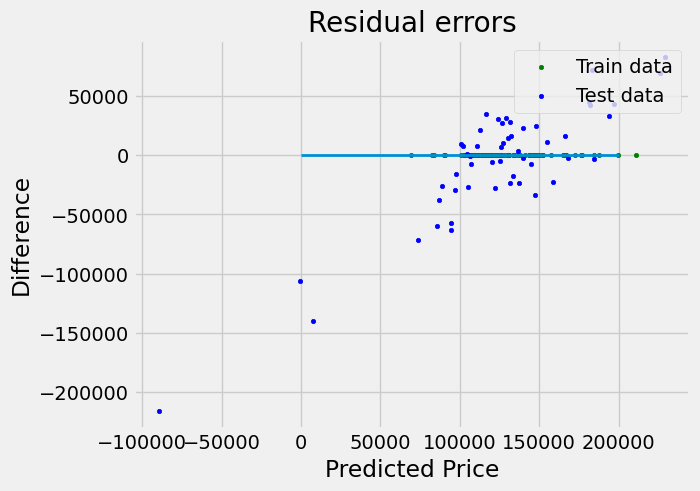

In [325]:
plt.scatter(poly_regressor.predict(poly.transform(X_train)), poly_regressor.predict(poly.transform(X_train)) - y_train,
            color="green", s=10, label='Train data')
plt.scatter(poly_regressor.predict(poly.transform(X_test)), poly_regressor.predict(poly.transform(X_test)) - y_test,
            color="blue", s=10, label='Test data')
plt.hlines(y=0, xmin=0, xmax=200000, linewidth=2)
plt.legend(loc='upper right')
plt.title("Residual errors")
plt.xlabel("Predicted Price")
plt.ylabel("Difference")
plt.show()

In [326]:
X_test_poly = poly.transform(X_test)
y_poly_pred = poly_regressor.predict(X_test_poly)
single_house_encoded_poly = poly.transform(single_house_encoded)

In [327]:
predicted_price = poly_regressor.predict(single_house_encoded_poly)
print(f"Predicted price for the house: ${predicted_price[0]:,.2f}")

Predicted price for the house: $93,942.26


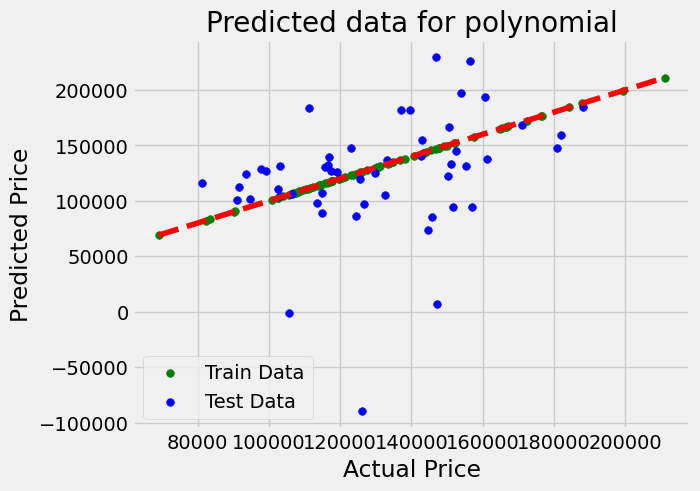

In [328]:
y_pred_train = poly_regressor.predict(X_train_poly)
y_pred_test = poly_regressor.predict(X_test_poly)
plt.scatter(y_train, y_pred_train, color='green', label='Train Data', s=30)
plt.scatter(y_test, y_pred_test, color='blue', label='Test Data', s=30)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title("Predicted data for polynomial")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.show()